In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_excel('Assure_Bon.xlsx')

FileNotFoundError: ignored

In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1','key_0','date_permis'],inplace=True)

In [ ]:
df

,CodeAssure_id,_id,gender,age,gouvernorat,secteur_activite,compagnie_actuelle,usage,age_vehicule,nb_sinistres,ancienne_compagnie,satisfaction,Assure
0,5301,0,female,24,Tunis,Immobilier,Zitouna takaful,Professionnel,7,0,Gat,3,Bon
1,5548,1,male,23,Nabeul,Banque,Maghrebia,Privé,5,2,Biat-assurance,5,Bon
2,5755,2,male,38,Mahdia,Agriculture,Bh assurance,Professionnel,10,3,Astree,4,Bon
3,5817,3,male,37,Mahdia,Automobile,Attakafulia,Professionnel,13,0,Aucune,4,Mauvais
4,5821,4,female,20,Monastir,Femme au foyer,Attakafulia,Privé,5,1,El amana takaful,3,Bon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35169,779352,35297,male,36,Sousse,Autre,Gat,Taxi,6,0,Bh assurance,4,Bon
35170,779353,35298,male,25,Bizerte,Immobilier,Maghrebia,Professionnel,19,4,El amana takaful,2,Bon
35171,779354,35299,female,36,Gabes,Tourisme,Attakafulia,Professionnel,4,3,Comar,2,Bon
35172,779355,35300,male,33,Sousse,Immobilier,LLoyd tunisien,Professionnel,14,2,El amana takaful,3,Bon


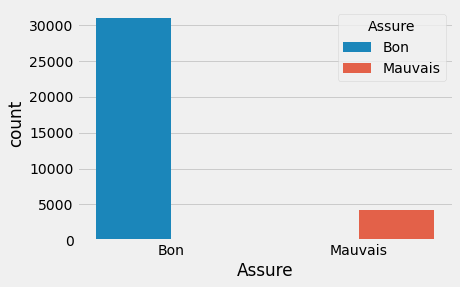

In [ ]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Assure', data=df, hue='Assure')

In [ ]:
Mauvais= df[df['Assure']=='Mauvais']

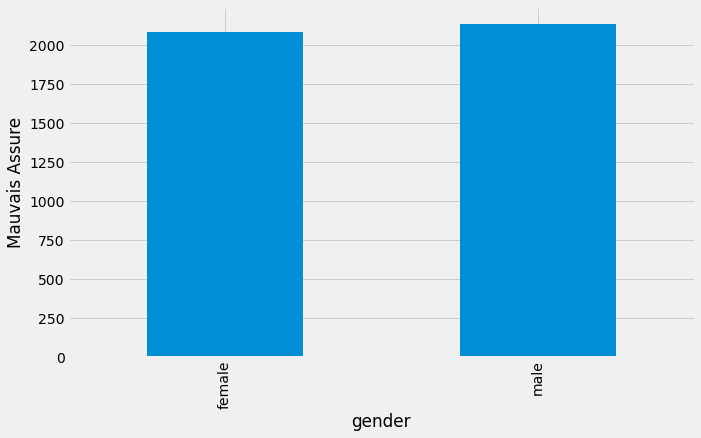

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Mauvais.groupby('gender').Assure.count().plot.bar(ylim=0)
ax.set_ylabel('Mauvais Assure')
plt.show()

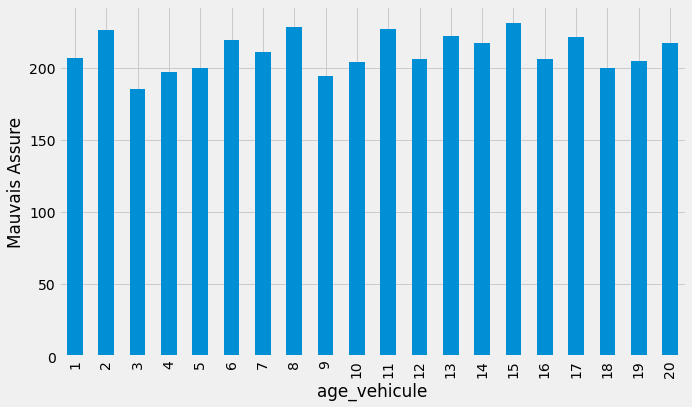

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Mauvais.groupby('age_vehicule').Assure.count().plot.bar(ylim=0)
ax.set_ylabel('Mauvais Assure')
plt.show()

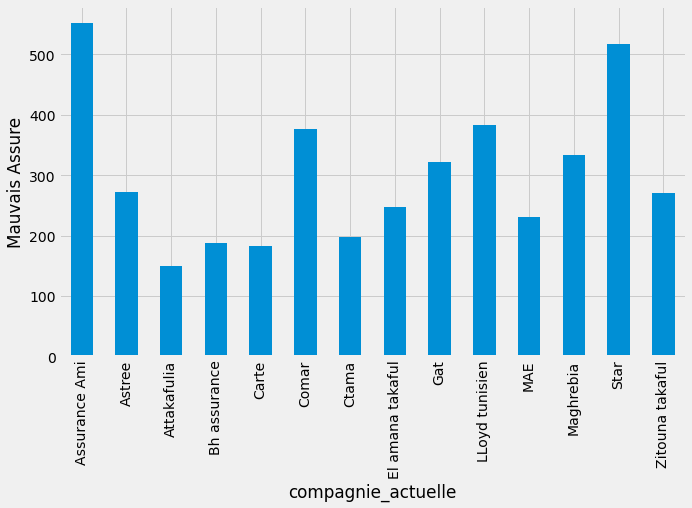

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Mauvais.groupby('compagnie_actuelle').Assure.count().plot.bar(ylim=0)
ax.set_ylabel('Mauvais Assure')
plt.show()

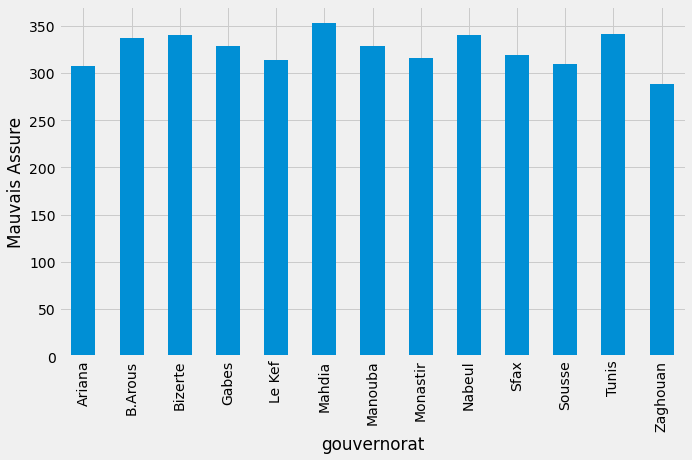

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = Mauvais.groupby('gouvernorat').Assure.count().plot.bar(ylim=0)
ax.set_ylabel('Mauvais Assure')
plt.show()

In [ ]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols =  df.columns[categorical_feature_mask].tolist()

In [ ]:
categorical_cols

['gender',
 'gouvernorat',
 'secteur_activite',
 'compagnie_actuelle',
 'usage',
 'ancienne_compagnie',
 'Assure']

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [ ]:
# apply le on categorical feature columns
X=df
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X[categorical_cols].head(10)

,gender,gouvernorat,secteur_activite,compagnie_actuelle,usage,ancienne_compagnie,Assure
0,0,11,6,13,3,10,0
1,1,8,3,11,2,5,0
2,1,5,0,3,3,1,0
3,1,5,1,2,3,3,1
4,0,7,5,2,2,9,0
5,0,10,7,10,3,8,0
6,1,5,0,4,2,9,0
7,1,12,3,4,2,3,1
8,1,5,9,5,2,10,1
9,1,0,7,9,2,10,0


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
target = X['Assure']

In [ ]:
all_X = X.drop(['Assure'], axis=1)
all_y = target

train_X, test_X, train_y, test_y = train_test_split(
   all_X, all_y, test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions_lr = lr.predict(test_X)
acc_lr = accuracy_score(test_y, predictions_lr)
acc_lr

0.87818052594172

Text(0, 0.5, 'Erreur')

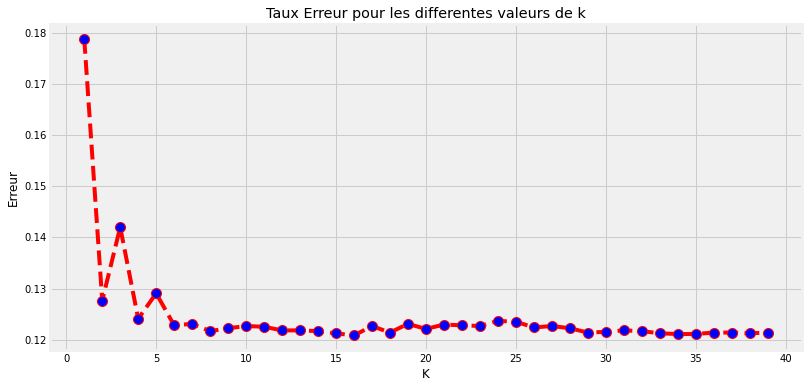

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(train_X, train_y)
    pred_i = knn_model.predict(test_X)
    error.append(np.mean(pred_i != test_y))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(train_X, train_y)
predictions_knn = knn.predict(test_X)
acc_knn = accuracy_score(test_y, predictions_knn)
acc_knn

0.8791755508173419

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
predictions = gaussian.predict(test_X)
acc_gaussian = accuracy_score(test_y, predictions)
acc_gaussian

0.8729211087420042

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
acc_lda = accuracy_score(test_y, predictions)
acc_lda

0.87818052594172

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
acc_qda = accuracy_score(test_y, predictions)
acc_qda

0.7818052594171997

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import tree
k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)
tree = tree.DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree, all_X, all_y, cv= k_fold, n_jobs=1, scoring=scoring)
(np.mean(score))
bagging_cart =np.mean(score)
bagging_cart

0.8045141902329996